# pysat demo using pysatMissions orbit simulations and associate methods

In [ ]:
import datetime as dt

In [ ]:
import pysat
import pysatMissions
import apexpy

In [6]:
# Set data directory if user hasn't already set one
print(f"old: {pysat.params['data_dirs']}")
if len(pysat.params['data_dirs']) == 0 or pysat.params['data_dirs'] == ['.']:
    # Set a directory for pysat to use for data
    pysat.params['data_dirs'] = '/home/jovyan/scratch_space/.pysat/'
else:
    print('pysat directory has been set previously. Leaving unchanged.')

print(f"new: {pysat.params['data_dirs']}")

old: ['/home/jovyan/scratch_space/.pysat']
pysat directory has been set previously. Leaving unchanged.
new: ['/home/jovyan/scratch_space/.pysat']


In [7]:
# Register the data plug-ins in pysatMissions. Only once per installation.
pysat.utils.registry.register_by_module(pysatMissions.instruments)
print(pysat.params['data_dirs'])

['/home/jovyan/scratch_space/.pysat']


In [8]:
# Define on-the-fly orbit breakdown input. Note that `mlt` variable will be added by custom function.
orbit_info = {'kind': 'lt', 'index': 'mlt', 'period': dt.timedelta(minutes=95)}

In [9]:
# Instantiate satellite propagator. Note that `inclination` and `alt_periapsis` are keywords defined by 
# `missions_sgp4` module, not pysat itself.
inst = pysat.Instrument('missions', 'sgp4', orbit_info=orbit_info, inclination=10, alt_periapsis=500.)

In [10]:
# Get information on SGP4 support as well as defined keyword arguments.
help(inst.inst_module)

Help on module pysatMissions.instruments.missions_sgp4 in pysatMissions.instruments:

NAME
    pysatMissions.instruments.missions_sgp4 - Simulate satellite orbit data using Two Line Elements (TLEs) and SGP4.

DESCRIPTION
    Properties
    ----------
    platform
        'missions'
    name
        'sgp4'
    tag
        None supported
    inst_id
        None supported

FUNCTIONS
    init(self)
        Initialize the Instrument object with required values.
        
        Runs once upon instantiation.
    
    load(fnames, tag=None, inst_id=None, tle1=None, tle2=None, alt_periapsis=None, alt_apoapsis=None, inclination=None, raan=0.0, arg_periapsis=0.0, mean_anomaly=0.0, epoch=None, bstar=0.0, one_orbit=False, num_samples=None, cadence='1S')
        Generate position of satellite in ECI co-ordinates.
        
        Parameters
        ----------
        fnames : list-like collection
            File name that contains date in its name.
        tag : string
            Identifies a pa

In [11]:
# Add additional information, like location in magnetic coordinates, including `mlt`.
inst.custom_attach(pysatMissions.methods.magcoord.add_quasi_dipole_coordinates, 
                   kwargs={'glong_label': 'geod_longitude', 'glat_label': 'geod_latitude',
                           'alt_label': 'geod_altitude' })

<AxesSubplot:title={'center':'Simulated Spacecraft Day'}, xlabel='Epoch', ylabel='MLT (hours)'>

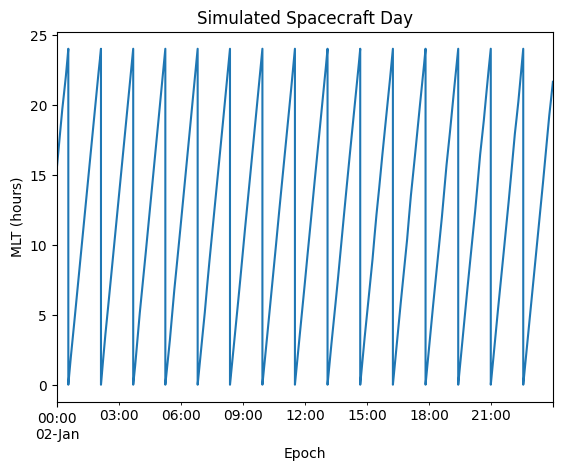

In [12]:
# Load a day of data and plot raw `mlt`. pysat appplies all custom functions during load process.
inst.load(2019, 2)
inst['mlt'].plot(title='Simulated Spacecraft Day', ylabel='MLT (hours)')

In [13]:
# Check out data before orbit breakdown. Full day of data.
inst.data

,position_eci_x,position_eci_y,position_eci_z,velocity_eci_x,velocity_eci_y,velocity_eci_z,position_ecef_x,position_ecef_y,position_ecef_z,velocity_ecef_x,...,velocity_ecef_z,latitude,longitude,mean_altitude,geod_latitude,geod_longitude,geod_altitude,qd_lat,qd_long,mlt
Epoch,,,,,,,,,,,,,,,,,,,,,
2019-01-02 00:00:00,6437.412627,-2191.094393,956.918632,2.549299,7.142026,-0.789411,-3414.746046,-5880.534450,956.918632,6.500905,...,-0.789411,8.010153,-120.143150,495.885935,8.059610,-120.143150,489.366044,13.437679,-49.387550,15.525165
2019-01-02 00:00:01,6439.957988,-2183.950949,956.128618,2.541364,7.144722,-0.790594,-3408.672064,-5884.186893,956.128618,6.504825,...,-0.790594,8.003495,-120.083440,495.886905,8.052913,-120.083440,489.366326,13.439775,-49.327400,15.529454
2019-01-02 00:00:02,6442.495411,-2176.804813,955.337422,2.533426,7.147409,-0.791775,-3402.594431,-5887.833001,955.337422,6.508738,...,-0.791775,7.996828,-120.023732,495.887877,8.046205,-120.023732,489.366608,13.441866,-49.267246,15.533743
2019-01-02 00:00:03,6445.024894,-2169.655995,954.545046,2.525484,7.150087,-0.792955,-3396.513154,-5891.472771,954.545046,6.512645,...,-0.792955,7.990151,-119.964026,495.888849,8.039488,-119.964026,489.366891,13.443953,-49.207088,15.538032
2019-01-02 00:00:04,6447.546434,-2162.504502,953.751490,2.517539,7.152757,-0.794134,-3390.428257,-5895.106188,953.751490,6.516544,...,-0.794134,7.983464,-119.904323,495.889823,8.032760,-119.904323,489.367176,13.446036,-49.146931,15.542322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-02 23:59:55,1813.242550,6565.273479,-891.093415,-7.327535,1.905244,-0.879810,6027.690482,-3171.373810,-891.093415,3.423786,...,-0.879810,-7.453682,-27.750390,497.912888,-7.499772,-27.750390,491.337376,-14.999699,42.180962,21.621696
2019-01-02 23:59:56,1805.913836,6567.174698,-891.972688,-7.329764,1.897158,-0.878709,6030.879805,-3165.058778,-891.972688,3.416855,...,-0.878709,-7.461078,-27.690884,497.913740,-7.507213,-27.690884,491.338941,-15.025801,42.239964,21.625909
2019-01-02 23:59:57,1798.582899,6569.067830,-892.850859,-7.331983,1.889070,-0.877607,6034.062646,-3158.740347,-892.850859,3.409919,...,-0.877607,-7.468465,-27.631376,497.914590,-7.514644,-27.631376,491.340505,-15.051846,42.299004,21.630123


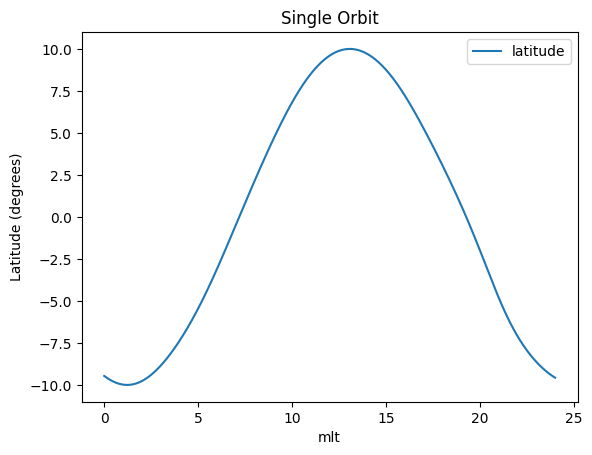

In [14]:
# Iterate orbit-by-orbit. Plot the first orbit then stop. To create this plot pysat also loads/simulates
# day previous to ensure that the first orbit is complete. 
for orbit_inst in inst.orbits:
    orbit_inst.data.plot(y='latitude', x='mlt', title='Single Orbit', ylabel='Latitude (degrees)')
    break

In [15]:
# Check out data after first orbit breakdown. Single orbit of data. Notice the first samples come from 2019, 1.
# pysat does its best to form complete orbits when possible, with a minimum of data loading. 
inst.data

,position_eci_x,position_eci_y,position_eci_z,velocity_eci_x,velocity_eci_y,velocity_eci_z,position_ecef_x,position_ecef_y,position_ecef_z,velocity_ecef_x,...,velocity_ecef_z,latitude,longitude,mean_altitude,geod_latitude,geod_longitude,geod_altitude,qd_lat,qd_long,mlt
Epoch,,,,,,,,,,,,,,,,,,,,,
2019-01-01 22:58:25,-1814.095252,6528.585146,-1128.913053,-7.312911,-2.105171,-0.425340,6382.499305,2275.317169,-1128.913053,-2.621616,...,-0.425340,-9.458946,19.620802,498.138416,-9.517025,19.620802,491.781538,-20.510044,93.074898,0.002774
2019-01-01 22:58:26,-1821.407108,6526.475939,-1129.337702,-7.310673,-2.113208,-0.423946,6380.040159,2281.994653,-1129.337702,-2.628952,...,-0.423946,-9.462537,19.680970,498.138809,-9.520636,19.680970,491.782368,-20.508640,93.134941,0.007050
2019-01-01 22:58:27,-1828.716721,6524.358697,-1129.760956,-7.308426,-2.121242,-0.422551,6377.574167,2288.669699,-1129.760956,-2.636285,...,-0.422551,-9.466115,19.741139,498.139202,-9.524236,19.741139,491.783195,-20.507212,93.194977,0.011326
2019-01-01 22:58:28,-1836.024083,6522.233422,-1130.182816,-7.306170,-2.129273,-0.421156,6375.101330,2295.342300,-1130.182816,-2.643615,...,-0.421156,-9.469682,19.801310,498.139592,-9.527823,19.801310,491.784020,-20.505758,93.254990,0.015600
2019-01-01 22:58:29,-1843.329184,6520.100116,-1130.603280,-7.303905,-2.137302,-0.419760,6372.621650,2302.012448,-1130.603280,-2.650942,...,-0.419760,-9.473237,19.861481,498.139982,-9.531399,19.861481,491.784842,-20.504280,93.314995,0.019874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-02 00:33:05,-1953.870858,6486.222438,-1139.849643,-7.269409,-2.257540,-0.387660,6765.589643,-339.837662,-1139.849643,0.317066,...,-0.387660,-9.551422,-2.875568,498.148591,-9.610046,-2.875568,491.803004,-21.155499,69.045753,23.978076
2019-01-02 00:33:06,-1961.139125,6483.960887,-1140.236605,-7.266999,-2.265524,-0.386252,6765.878303,-332.725485,-1140.236605,0.309291,...,-0.386252,-9.554694,-2.815366,498.148948,-9.613338,-2.815366,491.803763,-21.161169,69.112587,23.982814
2019-01-02 00:33:07,-1968.404978,6481.691353,-1140.622159,-7.264580,-2.273506,-0.384844,6766.159706,-325.612941,-1140.622159,0.301516,...,-0.384844,-9.557955,-2.755162,498.149304,-9.616618,-2.755162,491.804520,-21.166803,69.179413,23.987552


<AxesSubplot:title={'center':'Orbit: 1   01/02/19 00:33:10 - 01/02/19 02:07:56'}, xlabel='Epoch', ylabel='MLT (hours)'>

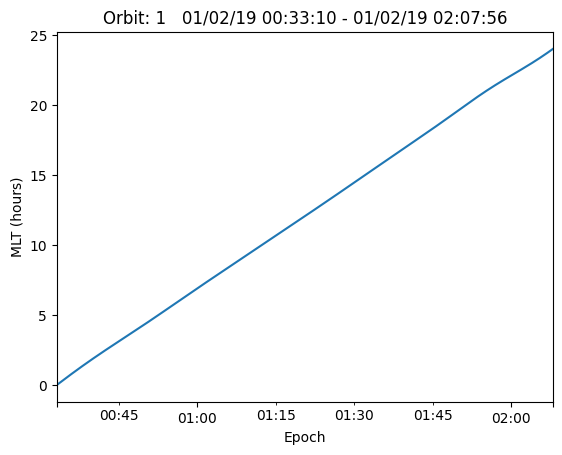

In [16]:
# The for loop above first takes some time to calculate as it is loading/simulating data.
# Now that is complete, moving forward in orbits will be fast until we get close to the end of the day.
# pysat will then load the next day, with the communserate simulation time.
# Move forward with orbits.next(), backward with orbits.prev(), and select particular orbit with orbits[]

inst.orbits.next()
# inst.orbits.prev()
# inst.orbits[5]

# Title string
date_str = '%x %X'
title = ''.join(['Orbit: ', repr(inst.orbits.current), '   ', inst.index[0].strftime(date_str), 
                 ' - ', inst.index[-1].strftime(date_str)])

# Make plot
inst['mlt'].plot(title=title, ylabel='MLT (hours)')